In [345]:
import torch as th
import numpy as np
from ipynb.fs.full.methods import dichotomy, fib, golden
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [408]:
def gradient_descent(f, eps_grad, optimizer, max_iters=500, dims=1):
    print(f'----- GradientDescent with optimizer {optimizer.__class__.__name__} -----')
    np.random.seed(123123)
    x = torch.tensor(np.random.rand(dims)).requires_grad_(True)
    iters = 0
    trace = []
    while (x.grad is None or th.max(th.abs(x.grad)) > eps_grad) and iters < max_iters:
        if x.grad is not None:
            x.grad.data.zero_()
        y = f(x)
        trace += [x.data.numpy()]
        y.backward()
        step = optimizer()
        x.data = x.data - step * x.grad.data
        iters += 1

    print(f'Num iters: {iters}')
    print(f'x = {x.detach().numpy()}')
    print(f'value = {y}')
    return np.array(trace), iters

In [276]:
class ConstOptimizer(Optimizer):
    def __init__(self, x):
        self.x = x
        
    def __call__(self):
        return self.x

In [298]:
class DivisionOptimizer(Optimizer):
    def __init__(self, x, mx):
        self.x = x
        self.mx = mx
        
    def __call__(self):
        self.x /= 2
        self.x = max(self.x, self.mx)
        return self.x * 2

In [231]:
def my_sin(x):
    if isinstance(x, th.Tensor):
        return th.sin(x)
    return np.sin(x)

In [343]:
COLOR_RED = np.linspace(240, 166, 256) / 255.
COLOR_GREEN = np.linspace(244, 188, 256) / 255.
COLOR_BLUE = np.linspace(246, 203, 256) / 255.

def plotLevels(func, xrange, yrange):
    levels = [0, 0.25, 1, 4, 9, 16, 25]

    x = np.linspace(xrange[0], xrange[1], 100)
    y = np.linspace(yrange[0], yrange[1], 100)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros(X.shape)
    for i in range(Z.shape[0]):
        for j in range(Z.shape[1]):
            Z[i, j] = float(func(th.Tensor([X[i, j], Y[i, j]]).double()))

    colors = np.vstack([COLOR_RED, COLOR_GREEN, COLOR_BLUE]).T
    my_cmap = ListedColormap(colors)

    _ = plt.contourf(X, Y, Z, levels=levels, cmap=my_cmap)
    CS = plt.contour(X, Y, Z, levels=levels, colors='#ABBECC')
    plt.clabel(CS, inline=1, fontsize=8, colors='#AAAEBB')
    plt.grid()

[28.0]

In [360]:
def plotTrace(trace):
    x_values, y_values = zip(*trace)
    plt.plot(x_values, y_values, '-o', linewidth=1.0, ms=5.0,
             alpha=1.0, c='C2', label="Trajectory")

In [409]:
def process_f(f, optimizer, dims=2):
    xs, _ = gradient_descent(f, 10 ** (-5), optimizer, dims=dims)
    plotLevels(f, [xs[:, 0].min() - 0.3, xs[:, 0].max() + 0.3], [xs[:, 1].min() - 0.3, xs[:, 1].max() + 0.3])
    plotTrace(xs)
    plt.show()

----- GradientDescent with optimizer ConstOptimizer -----
Num iters: 327
x = [ 0.15384615 -0.49999762]
value = 6.192307692320021


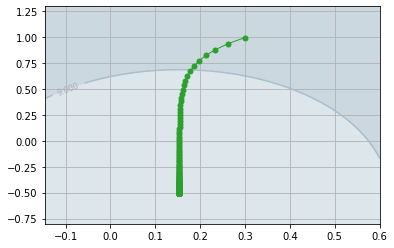

----- GradientDescent with optimizer DivisionOptimizer -----
Num iters: 154
x = [ 0.15384615 -0.4999978 ]
value = 6.192307692319105


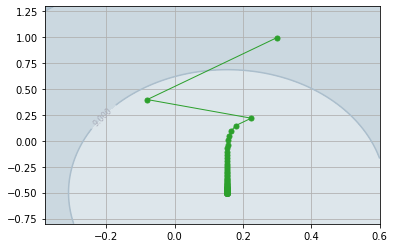

In [410]:
def f(x):
    return th.dot(th.Tensor([13, 2]).double(), x ** 2) - \
        th.dot(th.Tensor([4., -2.]).double(), x) + 7
process_f(f, ConstOptimizer(0.01))
process_f(f, DivisionOptimizer(0.1, 0.01))

----- GradientDescent with optimizer ConstOptimizer -----
Num iters: 209
x = [ 6.666651   -0.83333333]
value = 4.583333863232937


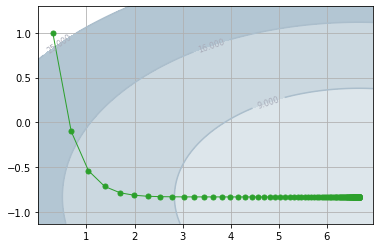

----- GradientDescent with optimizer DivisionOptimizer -----
Num iters: 203
x = [ 6.66665161 -0.83333333]
value = 4.583333863226699


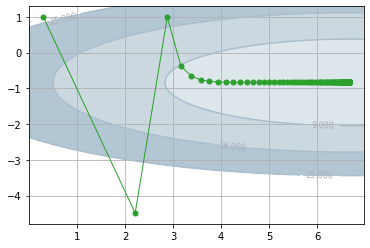

In [406]:
def f(x):
    return th.dot(th.Tensor([0.3, 3]).double(), x ** 2) - \
        th.dot(th.Tensor([4, -5.]).double(), x) + 20
process_f(f, ConstOptimizer(0.1))
process_f(f, DivisionOptimizer(0.5, 0.05))

----- GradientDescent with optimizer ConstOptimizer -----
Num iters: 164
x = [-0.62499893 -0.69999995]
value = -0.012499999994620481


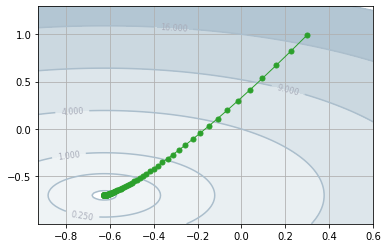

----- GradientDescent with optimizer DivisionOptimizer -----
Num iters: 5
x = [-0.625 -0.7  ]
value = -0.012500000000001066


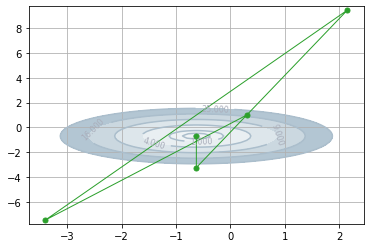

In [404]:
def f(x):
    return th.dot(th.Tensor([4, 5]).double(), x ** 2) - \
        th.dot(th.Tensor([-5, -7]).double(), x) + 4
process_f(f, ConstOptimizer(0.01))
process_f(f, DivisionOptimizer(0.5, 0.05))

----- GradientDescent with optimizer DivisionOptimizer -----
Num iters: 500
x = [0.22788063 0.47277225 0.57817205 0.45703164 0.58157731 0.55732587
 0.50108355 0.54977985 0.51832214 0.21783515]
value = -0.9861536630839738
----- GradientDescent with optimizer DivisionOptimizer -----
Num iters: 500
x = [ 2.30159438e+001  3.93422844e+000 -8.94782866e-001  7.80969771e+000
 -3.87550718e+000  1.83485969e-001  2.46731764e+000 -9.91529439e+001
 -1.96960799e+001 -6.12454395e+244]
value = inf
----- GradientDescent with optimizer DivisionOptimizer -----
Num iters: 359
x = [nan nan nan nan nan nan nan nan nan nan]
value = nan
----- GradientDescent with optimizer DivisionOptimizer -----
Num iters: 293
x = [nan nan nan nan nan nan nan nan nan nan]
value = nan
----- GradientDescent with optimizer DivisionOptimizer -----
Num iters: 259
x = [nan nan nan nan nan nan nan nan nan nan]
value = nan
----- GradientDescent with optimizer DivisionOptimizer -----
Num iters: 239
x = [nan nan nan nan nan nan nan na

ValueError: x and y must have same first dimension, but have shapes (10,) and (1,)

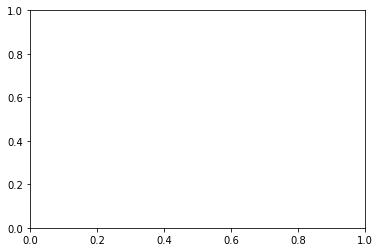

In [445]:
def part4():
    dims = [[10,'r'], [100, 'g'], [200, 'b'], [1000, 'y']]
    conditionings = [i for i in range(1, 1000, 100)]
    for sz in dims:
        for cond in conditionings:
            ans = []
            def func(x):
                v = th.Tensor(np.random.uniform(low=0, high=cond, size=sz[0]))
                v.data[-1] = cond
                v.data[0] = 1
                A = torch.diag(v)
                b = th.Tensor(np.random.uniform(low=0, high=cond, size=sz[0]))
                return th.dot(th.squeeze(th.mm(A.double(), th.unsqueeze(x, 1)), 1), x) - th.dot(b.double(), x)
            _, iters = gradient_descent(func, 10 ** (-5), DivisionOptimizer(0.5, 0.01), dims = sz[0])
            ans.append(iters)
        plt.plot(conditionings, ans, color = sz[1], label='n = {}'.format(sz[0]))
    plt.legend()
    plt.grid()

part4()

In [432]:
def ff(x):
    v = th.Tensor(np.random.uniform(low=0, high=cond, size=sz))
    v.data[-1] = cond
    v.data[0] = 1
    A = torch.diag(v)
    b = th.Tensor(np.random.uniform(low=0, high=cond, size=sz))
    return th.dot(th.squeeze(th.mm(A, th.unsqueeze(x, 1)), 1), x) - th.dot(b.double(), x)
process_f(ff, ConstOptimizer(0.01))

----- GradientDescent with optimizer ConstOptimizer -----


NameError: name 'cond' is not defined